In [1]:
import tensorflow as tf
from keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import typing

In [2]:
def count_files_in_directory(directory: str) -> None:
    for root, _, files in os.walk(directory):
        if files:
            print(f'Directory: {root} | No. Files: {len(files)}')

In [3]:
current_workdir = os.getcwd();

IMAGES_FOLDER = os.path.join(current_workdir, "input", "images")

count_files_in_directory(directory=IMAGES_FOLDER)

In [4]:
TRAIN_FOLDER = os.path.join(IMAGES_FOLDER, "train")
TEST_FOLDER = os.path.join(IMAGES_FOLDER, "test")
VAL_FOLDER = os.path.join(IMAGES_FOLDER, "val")

In [5]:
cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation="relu"))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation="relu"))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(layers.Flatten())

cnn.add(layers.Dense(activation = 'relu', units = 128))
cnn.add(layers.Dense(activation = 'sigmoid', units = 1))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

d:\dev\python\rx-images\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,183,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,203,393 (4.59 MB)

 Trainable params: 1,203,393 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(TRAIN_FOLDER,
                                                 target_size=(150, 150),
                                                 batch_size=20,
                                                 class_mode='binary')

validation_generator = test_datagen.flow_from_directory(VAL_FOLDER,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

test_set = test_datagen.flow_from_directory(TEST_FOLDER,
                                            target_size=(150, 150),
                                            batch_size=20,
                                            class_mode='binary')

Found 3512 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.
Found 1172 images belonging to 2 classes.


In [9]:
cnn_model = cnn.fit(training_set,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=50)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.7296 - loss: 0.5694

d:\dev\python\rx-images\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 436ms/step - accuracy: 0.7302 - loss: 0.5685 - val_accuracy: 0.9390 - val_loss: 0.1835
Epoch 2/10
 76/100 ━━━━━━━━━━━━━━━━━━━━ 5s 242ms/step - accuracy: 0.8755 - loss: 0.2935

C:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - accuracy: 0.8765 - loss: 0.2937 - val_accuracy: 0.8895 - val_loss: 0.2177
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 308ms/step - accuracy: 0.8716 - loss: 0.2963 - val_accuracy: 0.9330 - val_loss: 0.1719
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - accuracy: 0.9062 - loss: 0.2430 - val_accuracy: 0.9186 - val_loss: 0.2413
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 266ms/step - accuracy: 0.9163 - loss: 0.2127 - val_accuracy: 0.9560 - val_loss: 0.1281
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - accuracy: 0.8938 - loss: 0.2521 - val_accuracy: 0.9709 - val_loss: 0.1121
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 250ms/step - accuracy: 0.9236 - loss: 0.1977 - val_accuracy: 0.9380 - val_loss: 0.1654
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - accuracy: 0.9205 - loss: 0.2087 - val_accuracy: 0.9535 - val_loss: 0.1021
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 248ms/step - accuracy: 0.9337 - loss: 0.1742 - val

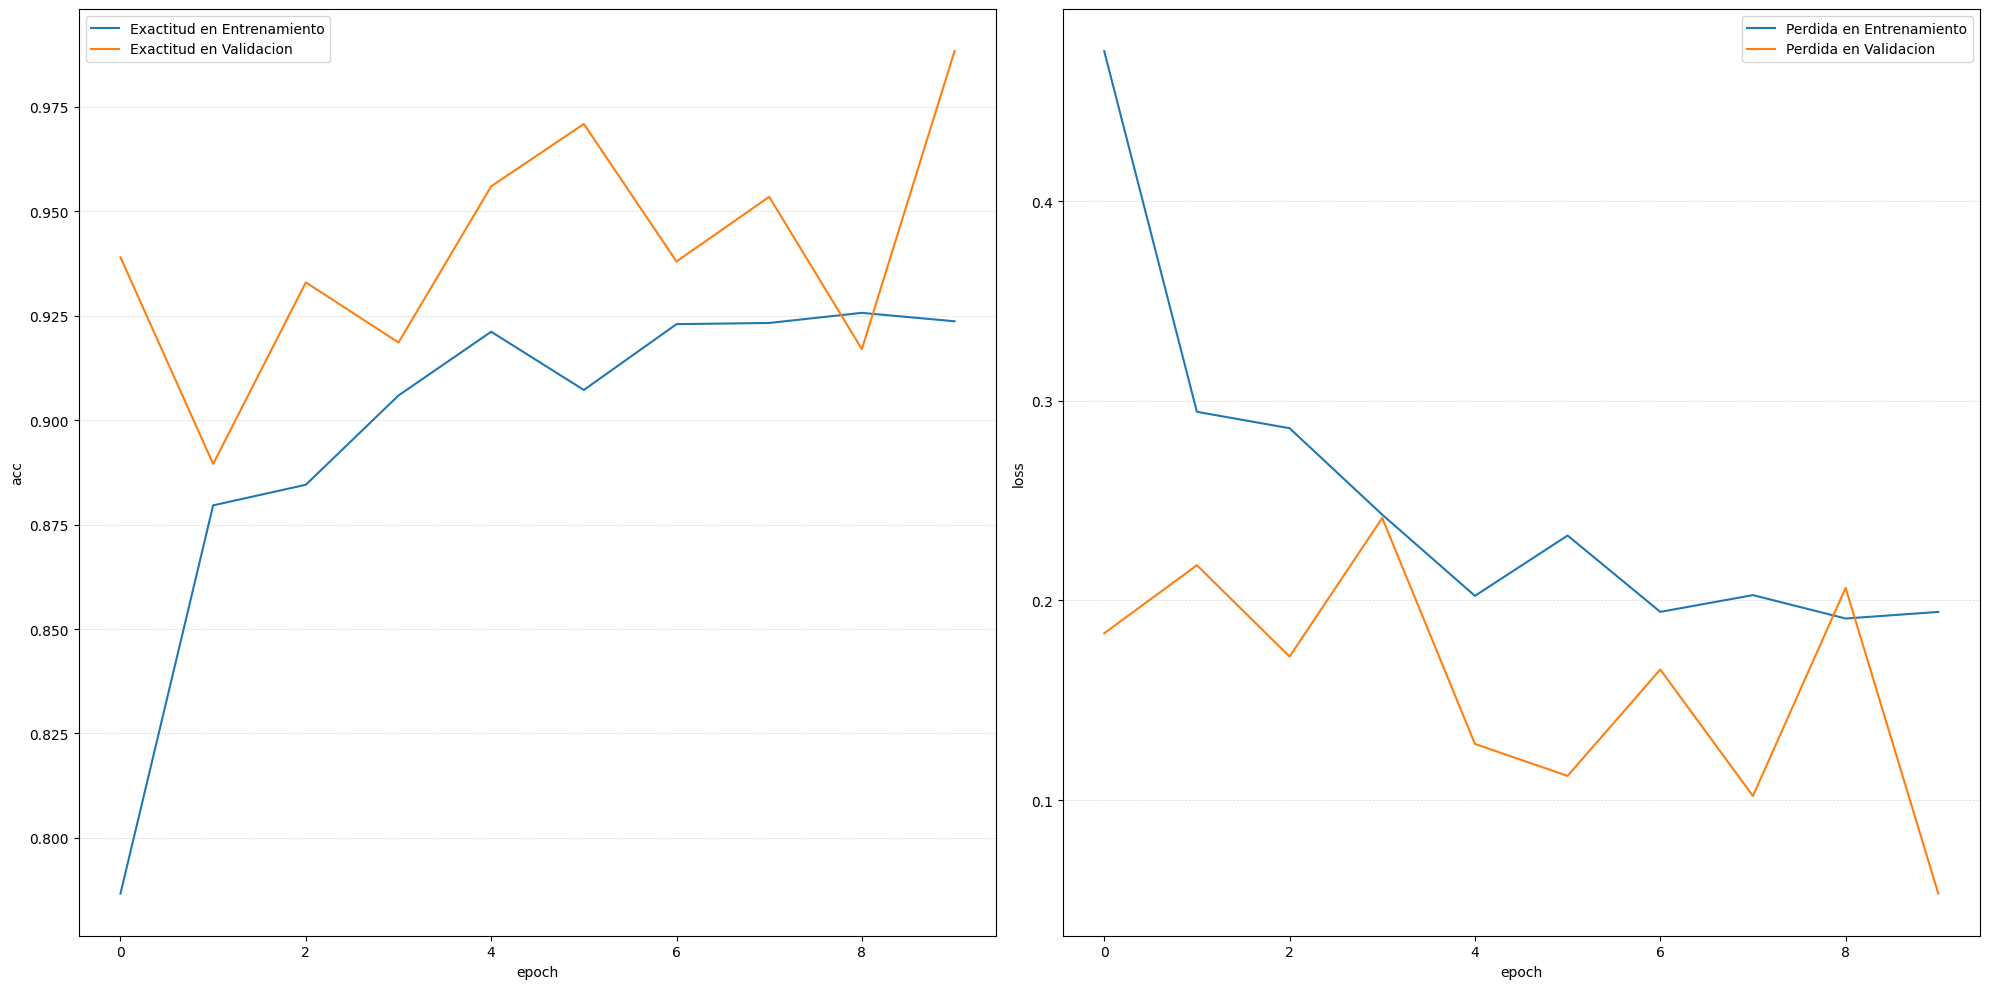

In [10]:
acc = cnn_model.history['accuracy']
val_acc = cnn_model.history['val_accuracy']
loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']
epochs = range(len(acc))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.set_palette('Spectral')

sns.lineplot(
    ax=axes[0],
    data=pd.DataFrame({'epoch': epochs, 'acc': acc}),
    x='epoch',
    y='acc',
    label='Exactitud en Entrenamiento'
)

sns.lineplot(
    ax=axes[0],
    data=pd.DataFrame({'epoch': epochs, 'val_acc': val_acc}),
    x='epoch',
    y='val_acc',
    label='Exactitud en Validacion'
)

sns.lineplot(
    ax=axes[1],
    data=pd.DataFrame({'epoch': epochs, 'loss': loss}),
    x='epoch',
    y='loss',
    label='Perdida en Entrenamiento'
)

sns.lineplot(
    ax=axes[1],
    data=pd.DataFrame({'epoch': epochs, 'val_loss': val_loss}),
    x='epoch',
    y='val_loss',
    label='Perdida en Validacion'
)

for ax in axes:
    ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
    
plt.tight_layout()
plt.show()

In [11]:
test_accu = cnn.evaluate(test_set,steps=50)

d:\dev\python\rx-images\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - accuracy: 0.8929 - loss: 0.3073


In [12]:
print(f'Accuracy: {test_accu[1] * 100}%')

Accuracy: 88.59999775886536%


In [ ]:
from fastapi import FastAPI, UploadFile, File
from fastapi.responses import JSONResponse
import nest_asyncio
import uvicorn
import uuid
import shutil

app = FastAPI()
uploads_dir = os.path.join(os.getcwd(), 'uploads')
os.makedirs(uploads_dir, exist_ok=True)


@app.post('/predict')
def predict(file: UploadFile = File(...)) -> JSONResponse:
    file_extension = os.path.splitext(file.filename)[1]
    file_name = f'{uuid.uuid4()}{file_extension}'
    file_path = os.path.join(uploads_dir, file_name)

    try:
        with open(file_path, 'wb') as buffer:
            shutil.copyfileobj(file.file, buffer)

        img_ori = cv2.imread(file_path)
        img_ori = cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img_ori, (150, 150), interpolation=cv2.INTER_CUBIC)
        img_to_test = np.reshape(img, (1, 150, 150, 3))
        predictions = cnn.predict(img_to_test)

        predictions_list = predictions.tolist() if hasattr(
            predictions, 'tolist') else predictions

        return JSONResponse(content={
            "predictions": predictions_list
        })

    except Exception as e:
        return JSONResponse(
            status_code=500,
            content={"error": str(e)}
        )

    finally:
        if os.path.exists(file_path):
            os.remove(file_path)

nest_asyncio.apply()
uvicorn.run(app, host="127.0.0.1", port=8000)

INFO:     Started server process [8996]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [8996]
